# Bản đồ có điểm thưởng

In [1]:
%matplotlib inline
%cd ../../source
from Graph import Graph
from searching_algorithms import *
from heuristic_func import euclide_heuristic, manhattan_heuristic
from bonus_wrapper import *

/home/hiraki/source/IntroAI/Project01/source


Với trường hợp này, tụi em đã nghĩ ra một phương án đó là ta sẽ tìm các chặng đường đường đi ngang qua các điểm thưởng sao cho tại mỗi đầu mút của chặng, ta sẽ đi đến điểm thưởng tiếp theo mà có tổng đường đi từ điểm hiện tại đến điểm đó là thấp nhất (đi trên từng chặng). 

Cụ thể, tụi em sẽ xây dựng một thuật toán wrapper như sau (nó sẽ gọi lại hàm tìm kiếm để thực hiện việc tìm kiếm trên từng chặng):

Duy trì một tập để chứa các ô bị cấm (ô ngõ cụt); một bảng tra chặng để biết được trước khi đi vào một node ta đã ở node nào (nhằm quay lại khi gặp ngõ cụt); một bảng tra để biết được từ một node nào đó, ta đã từng đi đến các node nào; và một tập để lưu đường đi trên từng chặng.

1. Gán node hiện tại `current = START`.
2. Nếu tất cả các điểm đi được đều đã bị cấm, kết thúc giải thuật.
3. Thêm các điểm đã đi của node liền trước vào danh sách các điểm đã đi của current (để không phát sinh chu trình).
4. Tìm ra điểm thưởng gần nhất (\*) với `current`, gọi đó là `dest`, sao cho từ `current` chưa đi `dest` và `dest` không bị cấm và `dest` != `current`.
5. Nếu không tồn tại `dest` nào thỏa, thêm `current` vào danh sách cấm, gán node `current` bằng node liền trước của nó. Quay lại bước 2.
6. Gọi thuật toán (GBFS, A\*) để tìm đường đi từ `current` đến `dest` sao cho *không trùng* với đường đi từ node liền trước vào `current` (để một ô không bị đi vào 2 lần). Thêm `dest` vào danh sách các node đã đi từ `current`.
7. Nếu không tồn tại đường đi, quay lại B2.
8. Nếu có đường đi từ `current` đến `dest`, ghi lại đường đi cũng như gán node liền trước `dest` là `current`.
9. Gán `current = dest`. Nếu `current` $\equiv$ `end`, kết thúc. Ngược lại, quay lại B2.

(\*) **Để đánh giá như thế nào là "gần nhất"**, tụi em sử dụng hàm đánh giá sau:

$$
f(u, v) = h(u, v) + h(v, e) + b(v)
$$

Trong đó:

- $f(u, v)$ là hàm đánh giá "độ gần" của đường đi từ $u$ đến $v$.
- $h(u, v)$ là hàm đánh giá khoảng cách heuristic từ đỉnh $u$ đến $v$.
- $h(v, e)$ là khoảng cách heuristic từ $v$ đến điểm kết thúc.
- $b(v)$ là trị số điểm thưởng của đỉnh $v$. Nếu $v$ không phải là đinhr điểm thưởng (vd: $v \equiv e$) thì $b(v) = b(e) = 0$.

Như vậy, thuật toán này (từ đây tụi em sẽ gọi là "thuật toán dẫn đường") sẽ cố gắng tìm đường đi tối ưu sao cho cân bằng giữa tổng trị số của điểm thưởng đã ăn và độ dài ước lượng của đường đi nếu đi ngang qua điểm thưởng nào đó. Còn việc tìm đường đi ngắn nhất trên từng chặng thì giao lại cho các thuật toán tương ứng là A* và GBFS.

Em sẽ không chạy bản đồ có điểm thưởng với DFS và BFS vì *về mặt lý thuyết* thì các thuật toán này không thể "nhìn trước" được bản đồ nên cũng không lên kế hoạch gì được (mặc dù nếu truyền vào thuật toán trên thì nó vẫn chạy được).

In [22]:
# Hàm client để chạy thuật toán tìm kiếm
def run_search_bonus(g: Graph, algorithm, heuristic, figsize=(5, 3)):
    # g: đồ thị được đọc vào 
    # algorithm: con trỏ đến hàm tìm kiếm cần chạy
    
    path_tracker, prev_node_tracker = bonus_wrapper(g, algorithm, heuristic)
    path, total_cost = process_path_total(g, path_tracker, prev_node_tracker)    
    g.visualize(path, figsize=figsize)
    print('Cost:', total_cost)

## Bản đồ 1 (3 điểm, 8x17)

In [23]:
g1 = Graph('testcases/bonus1.txt')

Graph initialized from maze with size 8 x 17


### Greedy Best First Search (Manhattan)

Going from (5, 13) to (1, 1)
Found a path! Keep going...
Going from (1, 1) to (3, 1)
Found a path! Keep going...
Going from (3, 1) to (7, 1)
Found a path! Keep going...
Yay! Finished!


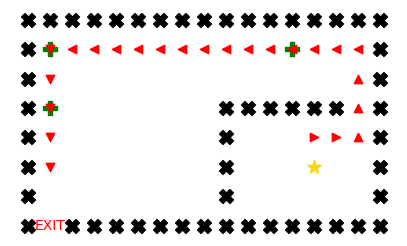

Starting point (x, y) = (5, 13)
Ending point (x, y) = (7, 1)
Bonus point at position (x, y) = (1, 1) with point -10
Bonus point at position (x, y) = (1, 12) with point -2
Bonus point at position (x, y) = (3, 1) with point -5
Cost: 9


In [24]:
run_search_bonus(g1, GBFS, manhattan_heuristic)

### Greedy Best First Search (Euclide)

Going from (5, 13) to (1, 1)
Found a path! Keep going...
Going from (1, 1) to (3, 1)
Found a path! Keep going...
Going from (3, 1) to (7, 1)
Found a path! Keep going...
Yay! Finished!


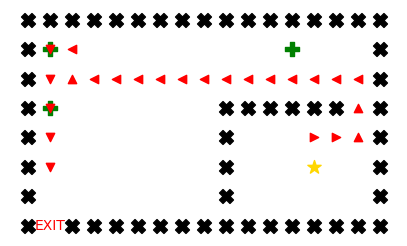

Starting point (x, y) = (5, 13)
Ending point (x, y) = (7, 1)
Bonus point at position (x, y) = (1, 1) with point -10
Bonus point at position (x, y) = (1, 12) with point -2
Bonus point at position (x, y) = (3, 1) with point -5
Cost: 11


In [25]:
run_search_bonus(g1, GBFS, euclide_heuristic)

Với 2 hàm heuristic khác nhau, GBFS đã cho ra 2 kết quả khác nhau. Nhìn vào log của giải thuật dẫn đường, ta thấy nó đã chọn con đường: $S \rightarrow (1, 1) \rightarrow (3, 1) \rightarrow E$ (trong đó S, E là điểm bắt đầu và kết thúc).

Ở lần thứ nhất, GBFS đã "ăn may" khi đi qua được điểm thưởng (1, 12), vốn không được chọn bởi thuật toán dẫn đường. Ở lần thứ hai, do sử dụng khoảng cách Euclide nên nó có xu hướng đi đường "chéo", cho nên nó đã không "ăn may" như lần đầu tiên nữa. Lý do em nói GBFS "ăn may" là vì bản thân hàm heuristic của GBFS hoàn toàn không quan tâm đến trọng số trên đường đi nên nó không thể biết được chỗ nào thực sự là có điểm thưởng. Nó chỉ biết được nơi có điểm thưởng nhờ thuật toán dẫn đường này.

### A* (Manhattan)

Going from (5, 13) to (1, 1)
Found a path! Keep going...
Going from (1, 1) to (3, 1)
Found a path! Keep going...
Going from (3, 1) to (7, 1)
Found a path! Keep going...
Yay! Finished!


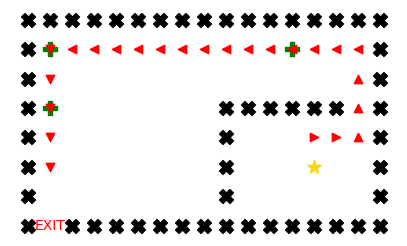

Starting point (x, y) = (5, 13)
Ending point (x, y) = (7, 1)
Bonus point at position (x, y) = (1, 1) with point -10
Bonus point at position (x, y) = (1, 12) with point -2
Bonus point at position (x, y) = (3, 1) with point -5
Cost: 9


In [30]:
run_search_bonus(g1, Astar, manhattan_heuristic)

### A* (Euclide)

Going from (5, 13) to (1, 1)
Found a path! Keep going...
Going from (1, 1) to (3, 1)
Found a path! Keep going...
Going from (3, 1) to (7, 1)
Found a path! Keep going...
Yay! Finished!


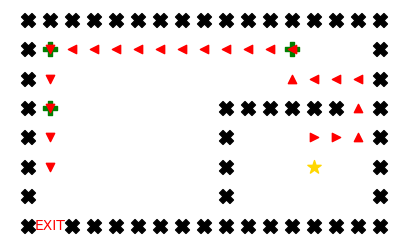

Starting point (x, y) = (5, 13)
Ending point (x, y) = (7, 1)
Bonus point at position (x, y) = (1, 1) with point -10
Bonus point at position (x, y) = (1, 12) with point -2
Bonus point at position (x, y) = (3, 1) with point -5
Cost: 9


In [31]:
run_search_bonus(g1, Astar, euclide_heuristic)

Với cả 2 hàm heuristic, A* đã chọn phương án ăn tất cả các điểm thưởng, và đương nhiên đây cũng chính là phương án tối thiểu hóa chi phí đường đi trong bản đồ này (tuy nhiên điều này có thể chỉ do trùng hợp). Hàm heuristic của A* cũng quan tâm đến trọng số của các cạnh, đó là lý do nó đã tìm được các điểm thưởng.

Lưu ý là với một số bản đồ khác, **tổng đường đi** mà nó tìm được có thể không phải là ngắn nhất vì nó còn phụ thuộc vào *sự hướng dẫn của thuật toán dẫn đường*, nên đường đi mà nó tìm được chỉ là *có vẻ là ngắn nhất* chứ không đảm bảo là ngắn nhất. Tuy nhiên, ta luôn luôn đảm bảo được rằng A* sẽ tìm được **đường đi ngắn nhất trên mỗi chặng**. Lý do là vì A* là một thuật toán *complete*, nên nó sẽ luôn tìm được đường đi ngắn nhất **giữa 2 điểm** nếu đường đi này có tồn tại. 

Tổng kết cho bản đồ 1:

| Thuật toán | Chi phí |
|------------|---------|
| GBFS (M)   | 9       |
| GBFS (E)   | 11      |
| A* (M)     | 9       |
| A* (E)     | 9       |

## Bản đồ 2 (5 điểm, 21x31)

In [43]:
g2 = Graph('testcases/bonus2.txt')

Graph initialized from maze with size 21 x 31


### Greedy Best-first Search (Manhattan)

Going from (1, 1) to (1, 17)
Found a path! Keep going...
Going from (1, 17) to (9, 13)
Found a path! Keep going...
Going from (9, 13) to (19, 13)
Found a path! Keep going...
Going from (19, 13) to (19, 30)
Going from (19, 13) to (16, 19)
Going from (19, 13) to (17, 26)
Hmmm, this seems to be a dead end. Me go back then.
Going from (9, 13) to (16, 19)
Going from (9, 13) to (17, 26)
Going from (9, 13) to (19, 30)
Hmmm, this seems to be a dead end. Me go back then.
Going from (1, 17) to (16, 19)
Found a path! Keep going...
Going from (16, 19) to (17, 26)
Going from (16, 19) to (19, 30)
Hmmm, this seems to be a dead end. Me go back then.
Going from (1, 17) to (17, 26)
Found a path! Keep going...
Going from (17, 26) to (19, 30)
Found a path! Keep going...
Yay! Finished!


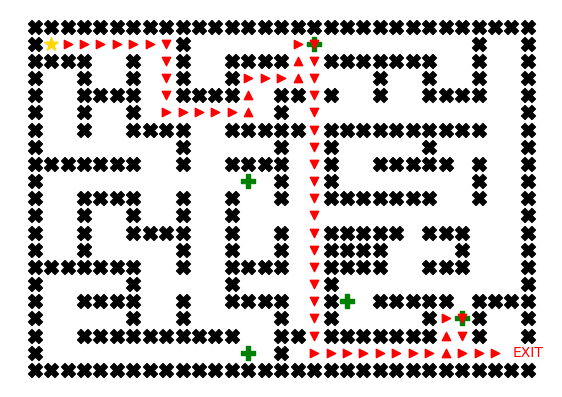

Starting point (x, y) = (1, 1)
Ending point (x, y) = (19, 30)
Bonus point at position (x, y) = (19, 13) with point -10
Bonus point at position (x, y) = (17, 26) with point -1
Bonus point at position (x, y) = (9, 13) with point -15
Bonus point at position (x, y) = (16, 19) with point -5
Bonus point at position (x, y) = (1, 17) with point -20
Cost: 38


In [44]:
run_search_bonus(g2, GBFS, manhattan_heuristic, figsize=(7, 5))

### Greedy Best-first Search (Euclide)

Going from (1, 1) to (1, 17)
Found a path! Keep going...
Going from (1, 17) to (9, 13)
Found a path! Keep going...
Going from (9, 13) to (16, 19)
Going from (9, 13) to (19, 13)
Found a path! Keep going...
Going from (19, 13) to (17, 26)
Going from (19, 13) to (19, 30)
Hmmm, this seems to be a dead end. Me go back then.
Going from (9, 13) to (17, 26)
Going from (9, 13) to (19, 30)
Hmmm, this seems to be a dead end. Me go back then.
Going from (1, 17) to (16, 19)
Found a path! Keep going...
Going from (16, 19) to (17, 26)
Going from (16, 19) to (19, 30)
Hmmm, this seems to be a dead end. Me go back then.
Going from (1, 17) to (17, 26)
Found a path! Keep going...
Going from (17, 26) to (19, 30)
Found a path! Keep going...
Yay! Finished!


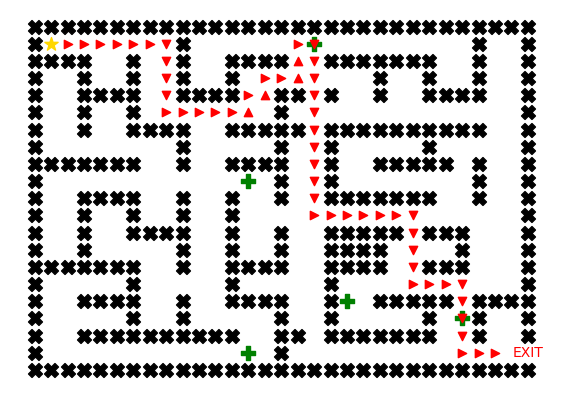

Starting point (x, y) = (1, 1)
Ending point (x, y) = (19, 30)
Bonus point at position (x, y) = (19, 13) with point -10
Bonus point at position (x, y) = (17, 26) with point -1
Bonus point at position (x, y) = (9, 13) with point -15
Bonus point at position (x, y) = (16, 19) with point -5
Bonus point at position (x, y) = (1, 17) with point -20
Cost: 34


In [45]:
run_search_bonus(g2, GBFS, euclide_heuristic, figsize=(7, 5))

### A* (Manhattan)

Going from (1, 1) to (1, 17)
Found a path! Keep going...
Going from (1, 17) to (9, 13)
Found a path! Keep going...
Going from (9, 13) to (19, 13)
Found a path! Keep going...
Going from (19, 13) to (19, 30)
Going from (19, 13) to (16, 19)
Going from (19, 13) to (17, 26)
Hmmm, this seems to be a dead end. Me go back then.
Going from (9, 13) to (16, 19)
Going from (9, 13) to (17, 26)
Going from (9, 13) to (19, 30)
Hmmm, this seems to be a dead end. Me go back then.
Going from (1, 17) to (16, 19)
Found a path! Keep going...
Going from (16, 19) to (17, 26)
Going from (16, 19) to (19, 30)
Hmmm, this seems to be a dead end. Me go back then.
Going from (1, 17) to (17, 26)
Found a path! Keep going...
Going from (17, 26) to (19, 30)
Found a path! Keep going...
Yay! Finished!


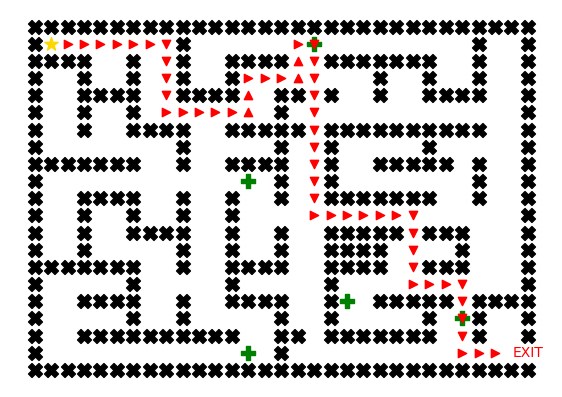

Starting point (x, y) = (1, 1)
Ending point (x, y) = (19, 30)
Bonus point at position (x, y) = (19, 13) with point -10
Bonus point at position (x, y) = (17, 26) with point -1
Bonus point at position (x, y) = (9, 13) with point -15
Bonus point at position (x, y) = (16, 19) with point -5
Bonus point at position (x, y) = (1, 17) with point -20
Cost: 34


In [46]:
run_search_bonus(g2, Astar, manhattan_heuristic, figsize=(7, 5))

### A* (Euclide)

Going from (1, 1) to (1, 17)
Found a path! Keep going...
Going from (1, 17) to (9, 13)
Found a path! Keep going...
Going from (9, 13) to (16, 19)
Going from (9, 13) to (19, 13)
Found a path! Keep going...
Going from (19, 13) to (17, 26)
Going from (19, 13) to (19, 30)
Hmmm, this seems to be a dead end. Me go back then.
Going from (9, 13) to (17, 26)
Going from (9, 13) to (19, 30)
Hmmm, this seems to be a dead end. Me go back then.
Going from (1, 17) to (16, 19)
Found a path! Keep going...
Going from (16, 19) to (17, 26)
Going from (16, 19) to (19, 30)
Hmmm, this seems to be a dead end. Me go back then.
Going from (1, 17) to (17, 26)
Found a path! Keep going...
Going from (17, 26) to (19, 30)
Found a path! Keep going...
Yay! Finished!


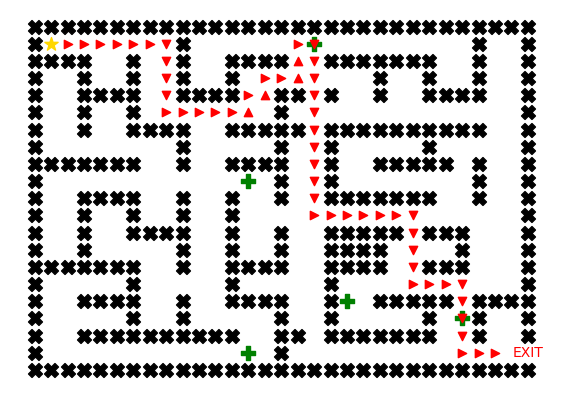

Starting point (x, y) = (1, 1)
Ending point (x, y) = (19, 30)
Bonus point at position (x, y) = (19, 13) with point -10
Bonus point at position (x, y) = (17, 26) with point -1
Bonus point at position (x, y) = (9, 13) with point -15
Bonus point at position (x, y) = (16, 19) with point -5
Bonus point at position (x, y) = (1, 17) with point -20
Cost: 34


In [47]:
run_search_bonus(g2, Astar, euclide_heuristic, figsize=(7, 5))

Ở cả 2 hàm heuristic, thuật toán dẫn đường đều cho cùng một kết quả. Nhưng kết quả tìm được giữa 2 thuật toán có sự khác biệt:

- GBFS hành xử khác nhau, tùy thuộc vào hàm heuristic là Euclide hay Manhattan. Với hàm heuristic là Euclide, nó đã tìm được đường đi ngắn nhất (do đường đi ngắn nhất thực sự là đi theo đường chéo, chứ không phải đi thẳng), trong khi Manhattan thì không.
- A* hành xử giống nhau với cả 2 hàm heuristic, và nó đã tìm được đường đi có vẻ là ngắn nhất trên bản đồ này.

Ngoài ra, khi hàm dẫn đường chạy với A*, có vẻ như là nó đã dẫn A* đi được nhiều đường hơn từ ô (17, 26), có lẽ là do bản thân A* đi không lòng vòng như GBFS nên đường đi ra từ ô này không "bị chặn" bởi đường mà nó đi vào từ ô khác.

| Thuật toán | Chi phí |
|------------|---------|
| GBFS (M)   | 38      |
| GBFS (E)   | 34      |
| A* (M)     | 34      |
| A* (E)     | 34      |

## Bản đồ 3 (10 điểm, 31x71)

In [48]:
g3 = Graph('testcases/bonus3.txt')

Graph initialized from maze with size 31 x 71


### Greedy Best-first Search (Manhattan)

Going from (1, 69) to (5, 2)
Found a path! Keep going...
Going from (5, 2) to (1, 0)
Going from (5, 2) to (15, 11)
Going from (5, 2) to (15, 15)
Going from (5, 2) to (15, 24)
Going from (5, 2) to (13, 42)
Going from (5, 2) to (16, 33)
Going from (5, 2) to (15, 47)
Going from (5, 2) to (17, 57)
Going from (5, 2) to (3, 64)
Going from (5, 2) to (29, 63)
Hmmm, this seems to be a dead end. Me go back then.
Going from (1, 69) to (17, 57)
Found a path! Keep going...
Going from (17, 57) to (15, 11)
Found a path! Keep going...
Going from (15, 11) to (15, 15)
Going from (15, 11) to (1, 0)
Found a path! Keep going...
Yay! Finished!


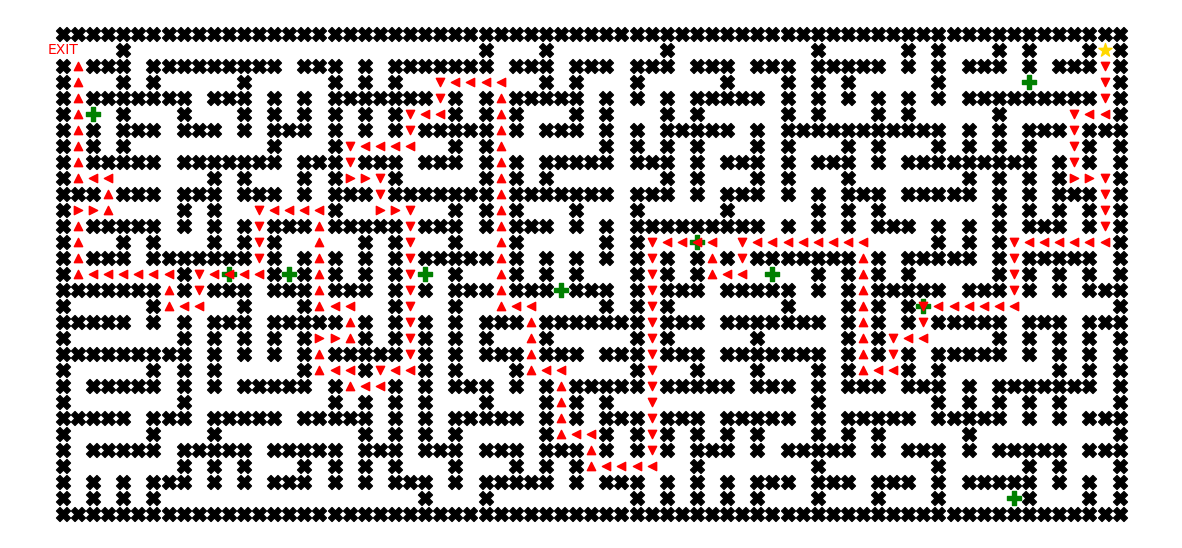

Starting point (x, y) = (1, 69)
Ending point (x, y) = (1, 0)
Bonus point at position (x, y) = (15, 15) with point -8
Bonus point at position (x, y) = (3, 64) with point -2
Bonus point at position (x, y) = (15, 47) with point -12
Bonus point at position (x, y) = (15, 24) with point -20
Bonus point at position (x, y) = (15, 11) with point -30
Bonus point at position (x, y) = (29, 63) with point -15
Bonus point at position (x, y) = (5, 2) with point -14
Bonus point at position (x, y) = (13, 42) with point -17
Bonus point at position (x, y) = (17, 57) with point -35
Bonus point at position (x, y) = (16, 33) with point -2
Cost: 129


In [49]:
run_search_bonus(g3, GBFS, manhattan_heuristic, figsize=(15, 7))

### Greedy Best-first Search (Euclide)

Going from (1, 69) to (17, 57)
Found a path! Keep going...
Going from (17, 57) to (15, 11)
Found a path! Keep going...
Going from (15, 11) to (5, 2)
Found a path! Keep going...
Going from (5, 2) to (1, 0)
Going from (5, 2) to (15, 15)
Going from (5, 2) to (15, 24)
Going from (5, 2) to (16, 33)
Going from (5, 2) to (13, 42)
Going from (5, 2) to (15, 47)
Going from (5, 2) to (29, 63)
Going from (5, 2) to (3, 64)
Hmmm, this seems to be a dead end. Me go back then.
Going from (15, 11) to (15, 15)
Going from (15, 11) to (1, 0)
Found a path! Keep going...
Yay! Finished!


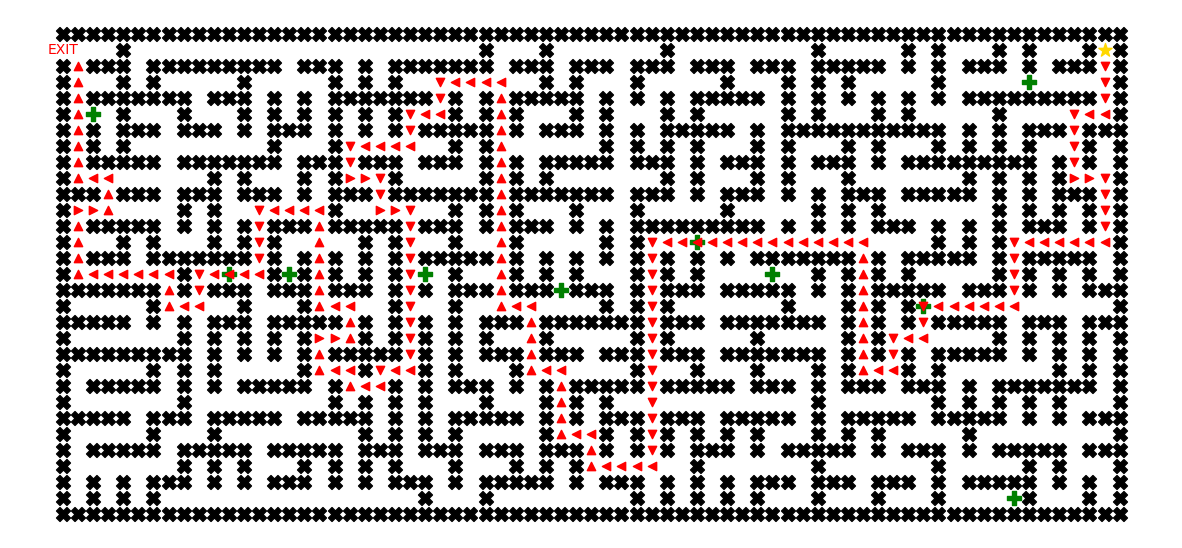

Starting point (x, y) = (1, 69)
Ending point (x, y) = (1, 0)
Bonus point at position (x, y) = (15, 15) with point -8
Bonus point at position (x, y) = (3, 64) with point -2
Bonus point at position (x, y) = (15, 47) with point -12
Bonus point at position (x, y) = (15, 24) with point -20
Bonus point at position (x, y) = (15, 11) with point -30
Bonus point at position (x, y) = (29, 63) with point -15
Bonus point at position (x, y) = (5, 2) with point -14
Bonus point at position (x, y) = (13, 42) with point -17
Bonus point at position (x, y) = (17, 57) with point -35
Bonus point at position (x, y) = (16, 33) with point -2
Cost: 125


In [50]:
run_search_bonus(g3, GBFS, euclide_heuristic, figsize=(15, 7))

Với heuristic là Euclide, nó đã chọn một đường đi khác và lần này nó đã không ăn may được như lần trước nữa. Trên đường đi nó không vô tình ăn được điểm thưởng nào cả.

### A* (Euclide)

Going from (1, 69) to (17, 57)
Found a path! Keep going...
Going from (17, 57) to (15, 11)
Found a path! Keep going...
Going from (15, 11) to (5, 2)
Found a path! Keep going...
Going from (5, 2) to (1, 0)
Going from (5, 2) to (15, 15)
Going from (5, 2) to (15, 24)
Going from (5, 2) to (16, 33)
Going from (5, 2) to (13, 42)
Going from (5, 2) to (15, 47)
Going from (5, 2) to (29, 63)
Going from (5, 2) to (3, 64)
Hmmm, this seems to be a dead end. Me go back then.
Going from (15, 11) to (15, 15)
Found a path! Keep going...
Going from (15, 15) to (15, 24)
Going from (15, 15) to (1, 0)
Going from (15, 15) to (16, 33)
Going from (15, 15) to (13, 42)
Going from (15, 15) to (15, 47)
Going from (15, 15) to (29, 63)
Going from (15, 15) to (3, 64)
Hmmm, this seems to be a dead end. Me go back then.
Going from (15, 11) to (1, 0)
Found a path! Keep going...
Yay! Finished!


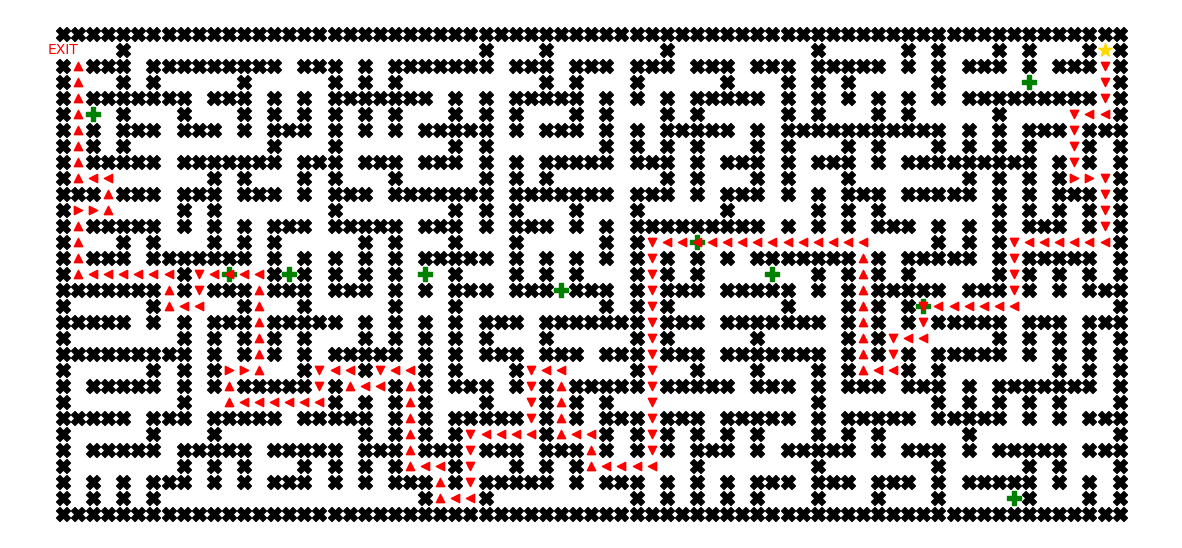

Starting point (x, y) = (1, 69)
Ending point (x, y) = (1, 0)
Bonus point at position (x, y) = (15, 15) with point -8
Bonus point at position (x, y) = (3, 64) with point -2
Bonus point at position (x, y) = (15, 47) with point -12
Bonus point at position (x, y) = (15, 24) with point -20
Bonus point at position (x, y) = (15, 11) with point -30
Bonus point at position (x, y) = (29, 63) with point -15
Bonus point at position (x, y) = (5, 2) with point -14
Bonus point at position (x, y) = (13, 42) with point -17
Bonus point at position (x, y) = (17, 57) with point -35
Bonus point at position (x, y) = (16, 33) with point -2
Cost: 93


In [51]:
run_search_bonus(g3, Astar, euclide_heuristic, figsize=(15, 7))

Nhận xét về hành vi của 2 thuật toán và thuật toán dẫn đường tương tự với các bản đồ trước. GBFS đã không tìm được đường đi ngắn nhất với cả 2 hàm heuristic. A* đã tìm được đường đi *có vẻ* là ngắn nhất.

| Thuật toán | Chi phí |
|------------|---------|
| GBFS (M)   | 129     |
| GBFS (E)   | 125     |
| A* (E)     | 93      |

### Bonus: A* mà không có thuật toán dẫn đường 

Ở ví dụ này tụi em sẽ chạy lại A* với bản đồ 3 (**có** điểm thưởng) mà không có thuật toán dẫn đường để xem thử nếu không có thuật toán dẫn đường, A* sẽ hành xử như thế nào. Lý do mà tụi em muốn thử trường hợp này là do thực tế, A* cũng có thể nhìn thấy được các điểm thưởng (do nó có quan tâm đến trọng số của các cạnh).

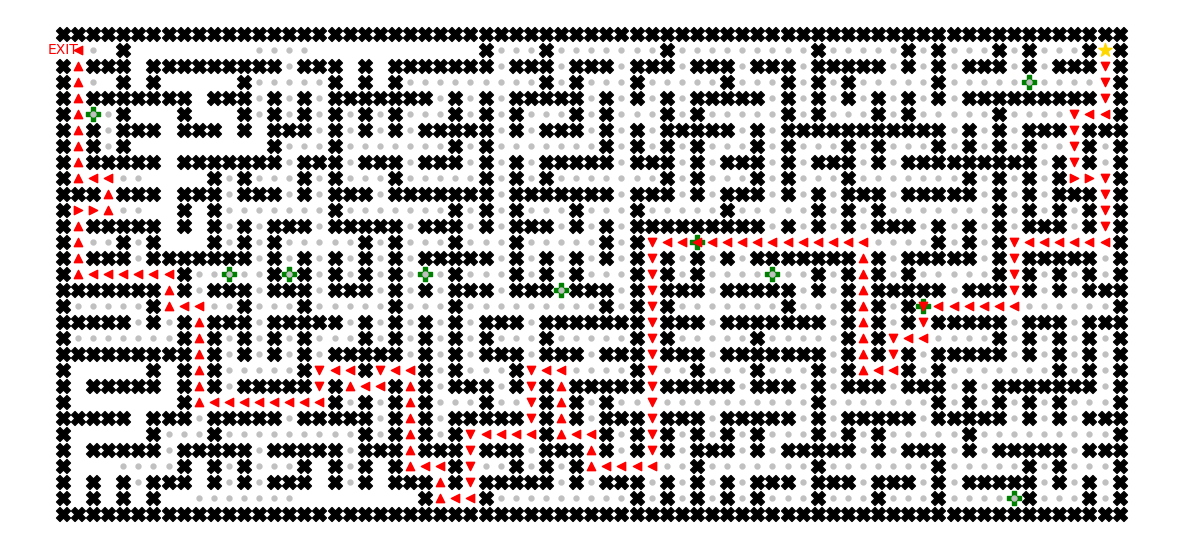

Starting point (x, y) = (1, 69)
Ending point (x, y) = (1, 0)
Bonus point at position (x, y) = (15, 15) with point -8
Bonus point at position (x, y) = (3, 64) with point -2
Bonus point at position (x, y) = (15, 47) with point -12
Bonus point at position (x, y) = (15, 24) with point -20
Bonus point at position (x, y) = (15, 11) with point -30
Bonus point at position (x, y) = (29, 63) with point -15
Bonus point at position (x, y) = (5, 2) with point -14
Bonus point at position (x, y) = (13, 42) with point -17
Bonus point at position (x, y) = (17, 57) with point -35
Bonus point at position (x, y) = (16, 33) with point -2
Cost: 115


In [56]:
g3.clear()
Astar(g3, euclide_heuristic)
visited, path, cost = g3.get_visited()
g3.visualize(path, visited=visited, figsize=(15, 7))
print('Cost:', cost)

Như vậy A* tìm được phương án tối ưu để ăn các điểm thưởng là nhờ vào thuật toán dẫn đường mà tụi em đã viết. Lý do là vì các điểm thưởng không "thu hút" được A* từ xa, mà nó chỉ biết đến sự tồn tại của các điểm này khi đường đi ngắn nhất từ START đến END đi qua lân cận các điểm thưởng đó.

| Thuật toán          | Chi phí |
|---------------------|---------|
| A* (có dẫn đường)   | 93      |
| A* (thông thường)   | 115     |

Tuy nhiên phương pháp này có một vấn đề mà tụi em sẽ trình bày trong phần tổng kết các thuật toán.